## Co applicant Income data analysis

#### Step 1. importing libraries



In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plx
import seaborn as sn
import plotly.express as pl



#### Step 2. Importing data

In [3]:
#load raw data
raw = pd.read_csv("Data/raw_data.csv")
meta = pd.read_csv("Data/metadata.csv")
raw

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Step 3. Isolate CoaplicantIncom column into it's own data frame

In addition we also check if there are any duplicate values

In [4]:
df = raw[['CoapplicantIncome']]
Co_applicant =raw[['CoapplicantIncome']]
test = df.select_dtypes("number").nunique()
test

CoapplicantIncome    287
dtype: int64

We foound that there are 287 unique values however we understand that this is numeric data and alot of our duplictes come from those who do not have ant Co-applicant income

# Univariate analysis

#### Step 4. Prepair data for box plot .
Here we prepair the data before we plot it onto a box plot by  identifying the Quartiles, inter qartile rang calculations ans well as Outlier identificaton for further under standing of the data

In [5]:

#Quartile and IQR
#find the quartile ranges to identify outliers
Q1= df['CoapplicantIncome'].quantile(0.25) 
Q2= df['CoapplicantIncome'].quantile(0.5)
Q3= df['CoapplicantIncome'].quantile(0.75)

inter_quartile_range = Q3-Q1

#find the inter quartile ranges
lower_bound = Q1 - (1.5*inter_quartile_range)
upper_bound = Q3 + (1.5*inter_quartile_range)

#isolate outliers
outliers_indexes = []
counter = 0
for index, row in enumerate(raw['CoapplicantIncome']):
    if row < lower_bound:
        outliers_indexes.append(index)
    else:
        if row > upper_bound:
            outliers_indexes.append(index)  

#Locate the outliers using the indexes from outliers_indexes
Outliers_df = raw['CoapplicantIncome'].loc[outliers_indexes]
#print(len(Outliers_df))
#print(Outliers_df.index)

#isolate outliers
Outliers_df = Co_applicant['CoapplicantIncome'].loc[outliers_indexes]

num_of_Outliers = len(outliers_indexes)
percentage_of_outliers = (num_of_Outliers)*100/len(df)
print(f"The percentage of outliers:\t{percentage_of_outliers.__round__(2)}%")

The percentage of outliers:	2.93%


#### Step 5. Plot boxplot 

c:\Users\amosm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amosm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


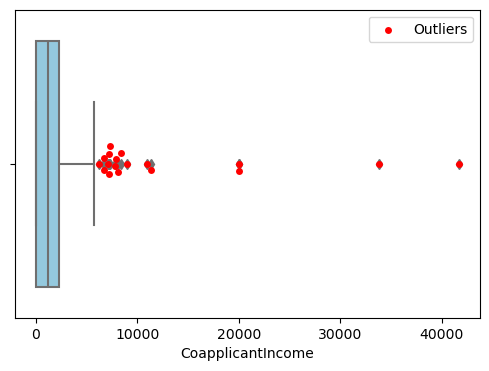

In [7]:
#Plot the box plot of the CoapplicantIncome column
plx.figure(figsize=(6,4))
sn.boxplot(x=raw['CoapplicantIncome'], color='skyblue')
sn.swarmplot(x=Outliers_df, color='red', label='Outliers')
plx.show() 

#### Takeaways

- Oultiers account for only 2.93% of the data.
- These applicnats have acceptionally high Co-applicant iincomes 
- Due to them accountiong for such low pecetage of the data this may indicate tht the bank rarely comes across
    applicants with such a high CAI "(Co applicant income)"
-and due to this these outliers will be removed 

#### Remove Outliers

In [30]:
#removing Outliers
#Drop the whole rows with outliers was using inplace !(run once)
raw.drop(outliers_indexes, inplace=True)

#### Step 6 prlot Histogram 

c:\Users\amosm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\amosm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



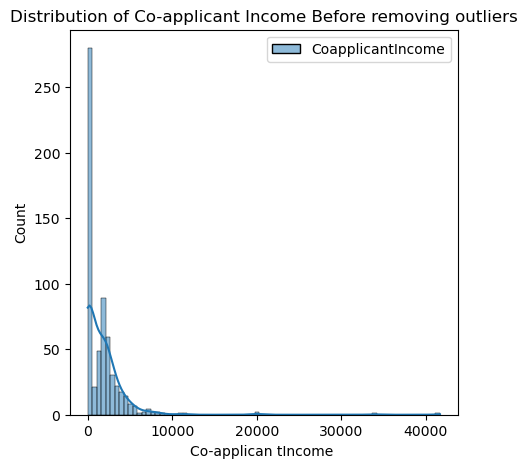

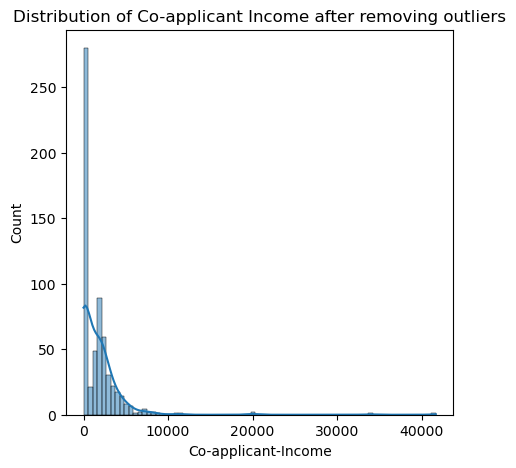

In [31]:
#check the distribution of CoapplicantIncome:
pl.figure(figsize=(5, 5))
sn.histplot(Co_applicant, kde=True)
pl.title('Distribution of Co-applicant Income Before removing outliers')
pl.xlabel('Co-applican tIncome ')


pl.figure(figsize=(5, 5))
sn.histplot(Co_applicant['CoapplicantIncome'], kde=True)
pl.title('Distribution of Co-applicant Income after removing outliers')
pl.xlabel('Co-applicant-Income')
pl.show()

#### Step 7. Statistical data

In [32]:
#Statistical measures

#Central Tendency
mean = raw['CoapplicantIncome'].mean().__round__(2)
median = raw['CoapplicantIncome'].median().__round__(2)

#Spread or Dispersion
std = raw['CoapplicantIncome'].std().__round__(2)
min = raw['CoapplicantIncome'].min().__round__(2)
max = raw['CoapplicantIncome'].max().__round__(2)

#Skewness
skew_coef =raw['CoapplicantIncome'].skew().__round__(2)
#K>0, heavier tails, K<0: lighter tails, k approx. 0: SIMILAR TAILS TO NORMAL
kurt_coeff = raw['CoapplicantIncome'].kurt().__round__(2)
 
print(f"Central Tendency:\n mean: {mean}\t median: {median}\n")
print(f"Spread:\n Standard deviation: {std}\t min:{min}\tmax:{max}\n")
print(f"Skewness coefficient: {skew_coef}\tKurtosis coefficent: {kurt_coeff}")

Central Tendency:
 mean: 1289.13	 median: 1031.0

Spread:
 Standard deviation: 1461.73	 min:0.0	max:5701.0

Skewness coefficient: 0.92	Kurtosis coefficent: 0.05


#### Key Takaways

* Avarage applicant has CAI or 1289.13
* majority of applicant request loans with 0 CAI
* highest CAI is recorded at 5701.0
* The data is skewed to the right 


# Bivarate analysis 


In [33]:
#Bivariate distributions

#Plot features to box plot that will repreaent the distribution of the data showing thr data range mean median and inter quatile range 
fig = px.box(data_frame=raw['CoapplicantIncome'], x='CoapplicantIncome', color=raw['Loan_Status'],
                 title=f'BoxPlot for Feature:CoapplicantIncome against the Target: Loan_Status')
fig.update_layout(xaxis_title=f'Loan_Status Feature')
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


#### Observation

Observation form the data we can clearly tell that co applicnt income was not a decising factor 
in being awarded a Loan, from both box plots we a cettain that the lower 25% of applicants had no Co applicant 
income, further more the the avarage of those denied and those accepted had incomes of 268 and 1,239.5 along with an upper fence of 5701 for 'yes' Loae_Status  and 5302 for 'No' Loae_Status  
Key points

In [11]:
# Log transformation
raw['Log_CoapplicantIncome'] = np.log(raw['CoapplicantIncome']) #created a new column
#print(raw_data_df.columns)

# Plot the transformed data
fig = px.histogram(data_frame=raw, x='Log_CoapplicantIncome', color='Loan_Status',
                   title='Histogram for Feature: LOG(CoapplicantIncome) against the Target: Loan_Status',
                   facet_col='Loan_Status')
fig.update_layout(xaxis_title='Log(CoapplicantIncome) Feature', showlegend=False)
fig.show()

c:\Users\amosm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



#### Statistical analysis using Co-applicant Incomee and Loan Status

In [12]:
#Analysis
#To avoid scaling back using exp() well work with CoapplicantIncome over CoapplicantIncome
#Seperate column between yes and no
yes_df = raw[raw['Loan_Status'] == 'Y'][['CoapplicantIncome']]
no_df = raw[raw['CoapplicantIncome'] == 'N'][['CoapplicantIncome']]

#Stats

#mean
mean_yes = yes_df['CoapplicantIncome'].mean().__round__(2)
mean_no = no_df['CoapplicantIncome'].mean().__round__(2)

#standard deviation
std_yes = yes_df['CoapplicantIncome'].std().__round__(2)
std_no = no_df['CoapplicantIncome'].std().__round__(2)

#skewness
skew_yes = yes_df['CoapplicantIncome'].skew().__round__(2)
skew_no = no_df['CoapplicantIncome'].skew().__round__(2)

#min max
min_yes = yes_df['CoapplicantIncome'].min().__round__(2)
max_yes =yes_df['CoapplicantIncome'].max().__round__(2)
mode_yes =yes_df['CoapplicantIncome'].mode().__round__(2)
min_no = no_df['CoapplicantIncome'].min().__round__(2)
max_no =no_df['CoapplicantIncome'].max().__round__(2)

#print(yes_df.columns)
print(f"Total number:\n Yes: {len(yes_df)}\tNo: {len(no_df)}\n")
print(f"Range of Values:")
print(f"\tYes\n \tmin: {min_yes}\t max: {max_yes}\t mode: {mode_yes}")
print(f"\tNo\n min: {min_no}\t max: {max_no}")
print(f"The mean (average):\nYes: {mean_yes}\tNo: {mean_no}\n")
print(f"The Standard deviation (spread):\nYes: {std_yes}\tNo: {std_no}\n")
print(f"The skewness coeffcient:\nYes: {skew_yes}\tNo: {skew_no}\n")

Total number:
 Yes: 412	No: 0

Range of Values:
	Yes
 	min: 0.0	 max: 5701.0	 mode: 0    0.0
Name: CoapplicantIncome, dtype: float64
	No
 min: nan	 max: nan
The mean (average):
Yes: 1328.2	No: nan

The Standard deviation (spread):
Yes: 1457.45	No: nan

The skewness coeffcient:
Yes: 0.91	No: nan



# Additional metric 
Pie chart that shows the approval rates of those with no Co-applicant invome versus those with co-applicant income

     CoapplicantIncome Loan_Status
1               1508.0           N
3               2358.0           Y
5               4196.0           Y
6               1516.0           Y
7               2504.0           N
..                 ...         ...
605             3800.0           N
606             2500.0           Y
607             1411.0           Y
608             1950.0           Y
611              240.0           Y

[323 rows x 2 columns]


c:\Users\amosm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



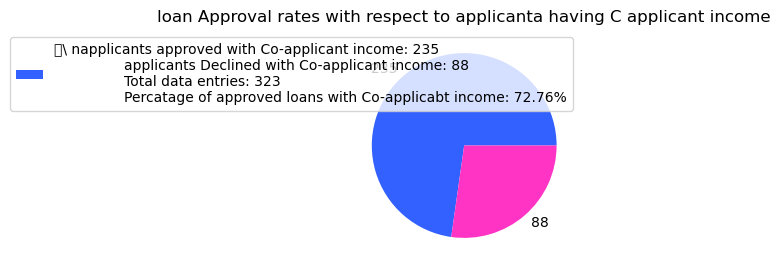

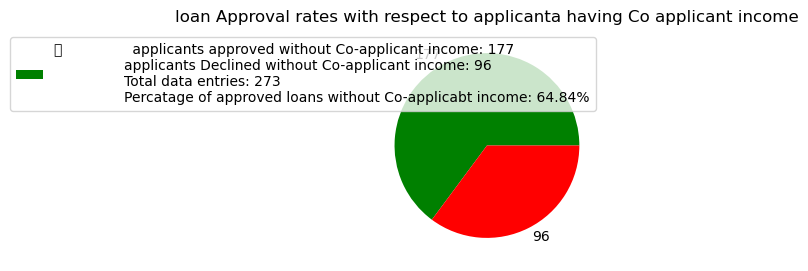

In [15]:
Appincome = raw[['CoapplicantIncome','Loan_Status']]
incom_positive = Appincome["CoapplicantIncome"]>0
print(Appincome[incom_positive])

Appincome = raw[['CoapplicantIncome','Loan_Status']]
incom_zero = Appincome["CoapplicantIncome"]==0
yes = Appincome[incom_positive]
no = Appincome[incom_zero]
#count values and calulate totals 
yes_total = yes['Loan_Status'].value_counts()
No_total= no['Loan_Status'].value_counts()
All_CoappIcY = yes_total['Y'] + yes_total['N']
All_CoappIcN = No_total['Y'] + No_total['N']
#calculating peercentages for approved loan applicatins for applicans with and without CoapplicantIncome
approved_with_CoAppInc = (yes_total['Y']/All_CoappIcY)*100
approved_without_CoAppInc = (No_total['Y']/All_CoappIcN)*100
#Create Pie charts and plot data
pl.figure(figsize=(3,3))
pl.pie(yes_total, labels= yes_total, colors=('#3361FF',"#FF33C4"))
pl.title("loan Approval rates with respect to applicanta having C applicant income")
pl.legend(labels=[f"\t\ napplicants approved with Co-applicant income: {yes_total['Y']}\n\
                applicants Declined with Co-applicant income: {yes_total['N']}\n\
                Total data entries: {All_CoappIcY}\n\
                Percatage of approved loans with Co-applicabt income: {approved_with_CoAppInc:.2f}%"
                
                ]
                    , loc='best', facecolor=None
                    )
pl.figure(figsize=(3,3))
pl.pie(No_total, labels= No_total, colors=('g',"r"))
pl.title("loan Approval rates with respect to applicanta having Co applicant income")
pl.legend(labels=[f"\t\
                applicants approved without Co-applicant income: {No_total['Y']}\n\
                applicants Declined without Co-applicant income: {No_total['N']}\n\
                Total data entries: {All_CoappIcN}\n\
                Percatage of approved loans without Co-applicabt income: {approved_without_CoAppInc:.2f}%"
                   
                   ]           
                    , loc='best', facecolor=None
                    )
pl.show()


#### Observation

 from the pie charts we are able to deduce that over 70 percet of applicant had a higher achnce of getting
 a loan approved if they had Co--applicant income 

# Property area data analysis


#### Step 1 importing libraries

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot
import plotly.express as px

#### Step 2. importing and aggrigating data

In [18]:
#importing data 
raw_data = pd.read_csv("Data/raw_data.csv")
#print(raw_data)
meta_data = pd.read_csv("Data/metadata.csv")
#print(meta_data.head)
#aggrigating Property_area feature
propA_df = pd.DataFrame(
        raw_data[['Property_Area', 'Loan_Status']]
        .groupby('Loan_Status')
        .value_counts()
        .reset_index()
    )

#### Step 3 prepair data for plotting 

In [20]:
fig = px.bar(
    data_frame=propA_df,
    x = 'Property_Area',
    y = 'count',
    facet_col=  'Loan_Status',
    color = propA_df['Loan_Status'].astype(str),
)

#### Step 4. Plot data on bar graph

In [21]:
#Nmae figure X and Y axis
fig.update_layout(xaxis_title='Property Area', yaxis_title='Number of entries')
fig.show()

### Observation
From the graph, we see that those living in semi-urban areas had higher chances of getting their loans approved unlike those living in urban and rural areas

### Addional metric 

Pie chart that shows the approval rates of applicants based on thier property area 

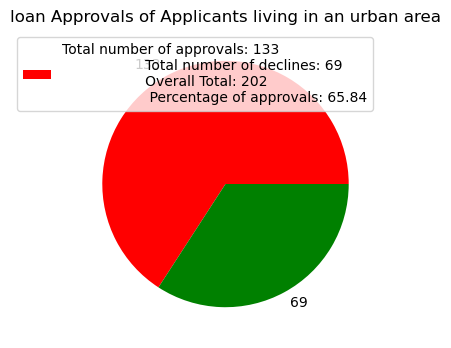

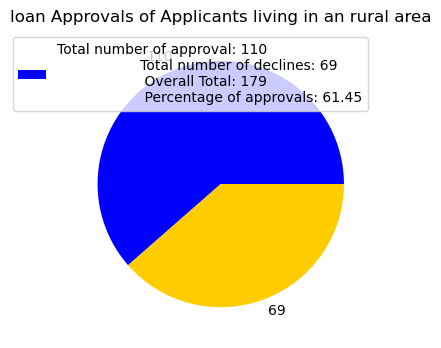

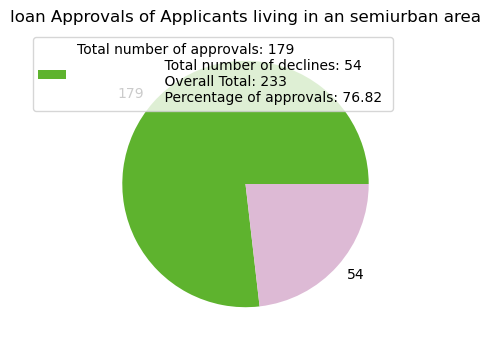

In [22]:
# Pie charts will represent amout of people's approval rated depending on their property area 
#and percetage of approvals will be shown inthe legend 
Urban_Area_only = raw_data['Property_Area'] == "Urban"
Rural_Area_only = raw_data['Property_Area'] == "Rural"
Semiurban_Area_only = raw_data['Property_Area'] == "Semiurban"
Urban = raw_data[Urban_Area_only] 
Rural= raw_data[Rural_Area_only] 
Semiurban = raw_data[Semiurban_Area_only] 
#print(Urban)

#isolate and count data in Property area column
Property_area_totU = Urban['Loan_Status'].value_counts()
Property_area_totR= Rural['Loan_Status'].value_counts()
Property_area_totSU = Semiurban['Loan_Status'].value_counts()
Missing_values_in_Property_area = meta_data.loc[meta_data['Column Name'] == 'Property_Area','missing Values'].values[0]
#Calculate totals 
Urban_Totals = Property_area_totU['Y']+Property_area_totU['N']
Rural_Totals = Property_area_totR['Y']+Property_area_totR['N']
Semiurban_Totals = Property_area_totSU['Y']+Property_area_totSU['N']
#Calculate percentages
Urban_Percentage = (Property_area_totU['Y']/Urban_Totals)*100
Rural_Percentage = (Property_area_totR['Y']/Rural_Totals)*100
Semiurban_Percentage = (Property_area_totSU['Y']/Semiurban_Totals)*100
#Creating and plotting pie chart
plot.figure(0,figsize=(4,4))
plot.pie(Property_area_totU, labels= Property_area_totU, colors=('r',"g"))
plot.title("loan Approvals of Applicants living in an urban area")
plot.legend(labels=[f"Total number of approvals: {Property_area_totU['Y']}\n\
                   Total number of declines: {Property_area_totU['N']}\n\
                   Overall Total: {Urban_Totals}\n\
                    Percentage of approvals: {Urban_Percentage:.2f}"
                   
                ]
                    , loc='upper right', facecolor=None)
plot.figure(1,figsize=(4,4))
plot.pie(Property_area_totR, labels= Property_area_totR, colors=('b',"#ffcc00"))
plot.title("loan Approvals of Applicants living in an rural area")
plot.legend(labels=[f"Total number of approval: {Property_area_totR['Y']}\n\
                   Total number of declines: {Property_area_totR['N']}\n\
                    Overall Total: {Rural_Totals}\n\
                    Percentage of approvals: {Rural_Percentage:.2f}"
                   
                ]
                    , loc='upper right', facecolor=None)
plot.figure(2,figsize=(4,4))
plot.pie(Property_area_totSU, labels= Property_area_totSU, colors=('#5eb32e','#ddbad5'))
plot.title("loan Approvals of Applicants living in an semiurban area")
plot.legend(labels=[f"Total number of approvals: {Property_area_totSU['Y']}\n\
                    Total number of declines: {Property_area_totSU['N']}\n\
                    Overall Total: {Semiurban_Totals}\n\
                    Percentage of approvals: {Semiurban_Percentage:.2f} "
                   
                ]
                    , loc='upper right', facecolor=None)


plot.show()
